## Stochastic Processes with Python: Numerical Tools & Distributions

**Goal:** In this notebook we'll dive into the numerical Python ecosystem used in stochastic modelling. Here, we cover:

- Random Seed
- NumPy fundamentals
- Pandas fundamentals
- Matplotlib fundamentals
- SciPy statistics and interpolation
- Basic statistical summaries: mean, variance, std, covariance
- Sampling from Bernoulli, Binomial, Geometric, Poisson, and Gaussian (Normal) distributions
- Practical Examples 


### Random Seed (Setup and reproducibility) 

Reproducibility is important in simulations. Here, we show how to set random seed.

- A random seed is an initial value used by a random number generator to ensure that the sequence of generated random numbers is reproducible.

- The key difference between python's random seed and that of numpy (np) is that np.random.seed() controls NumPy’s independent random number generator (optimized for arrays and scientific computing), while python's random.seed() controls Python’s built-in random module (better for simple randomization in general-purpose tasks)

In [1]:
import numpy as np
import random
import time

# Set seeds for reproducibility
np.random.seed(42)   # NumPy random seed
random.seed(42)      # python's random module

print('NumPy RNG and python random seeded with 42')

# Demonstrate reproducible draws
print('NumPy draw:', np.random.rand(3))
print('Python random draw:', [random.random() for _ in range(3)])

NumPy RNG and python random seeded with 42
NumPy draw: [0.37454012 0.95071431 0.73199394]
Python random draw: [0.6394267984578837, 0.025010755222666936, 0.27502931836911926]


_**Note**: The value 42 is often used as a random seed because it’s a joke/reference from Douglas Adams’ book The Hitchhiker’s Guide to the Galaxy, where “42” is the “Answer to the Ultimate Question of Life, the Universe, and Everything”_

_In practice, the seed can be any integer. Using 42 is just a fun, memorable convention adopted by engineers and data scientists._

## NumPy basics: arrays, vectorized ops, statistics

- NumPy arrays are the workhorse for numerical computations. Vectorized operations are fast and concise.

_(NumPy provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more)_

(You can do a lot with NumPy, learn more from here - https://numpy.org/doc/2.3/)

In [2]:
import numpy as np

# Create arrays
a = np.array([1,2,3,4])
b = np.linspace(0,1,5)  # evenly spaced

print('a:', a)
print('b:', b)

# Vectorized ops
print('a + 2:', a + 2)
print('Elementwise product a * a:', a * a)

# Broadcasting example
c = np.array([[1],[2],[3]])
print('c * a (broadcast):')
print(c * a)

# Statistical functions
big = np.random.normal(loc=0, scale=1, size=100000) # Sampling from a random Gaussian/Normal distribution
print('Mean (big):', big.mean()) # Mean
print('Var (big):', big.var()) # Variance
print('Std (big):', big.std()) # Standard Deviation

a: [1 2 3 4]
b: [0.   0.25 0.5  0.75 1.  ]
a + 2: [3 4 5 6]
Elementwise product a * a: [ 1  4  9 16]
c * a (broadcast):
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]
Mean (big): -0.000718374244638373
Var (big): 1.0036657660585389
Std (big): 1.001831206370883


## Pandas: tabular data and group summaries

Pandas builds on NumPy to provide labeled, tabular data. It is useful for storing simulation outputs and computing group statistics in Stochastic processes.

(You can use pandas to import, manipulate and analyze data, findout about its different use cases and APIs here - https://pandas.pydata.org/docs/)

In [3]:
import pandas as pd

# Lets create DataFrame of simulated arrivals (Poisson) across 3 servers
np.random.seed(1)
arrivals_server1 = np.random.poisson(lam=2, size=50) # Poisson arrivals with different rates, lam represents average rate, 
                                                        # size is number of samples
arrivals_server2 = np.random.poisson(lam=4, size=50)
arrivals_server3 = np.random.poisson(lam=1, size=50)

df = pd.DataFrame({
    'server1': arrivals_server1,
    'server2': arrivals_server2,
    'server3': arrivals_server3
}) # A DataFrame is a data structure with columns of potentially different types, helps in data manipulation and analysis

# Add a time index (discrete time slots)
df['time_slot'] = np.arange(len(df)) # Adding a time_slot column with sequential integers to represent discrete time slots
# Print out new shape of the DataFrame
print('DataFrame shape:', df.shape)

# Print first few rows
print('\nFirst few rows of DataFrame:')
print(df.head())

# Summary statistics
print('\nColumn means:')
print(df[['server1','server2','server3']].mean())

# Grouping example: categorize busy slots
df['busy_server2'] = df['server2'] > 5
print('\nBusy slots on server2 (first 10):')
print(df[['time_slot','server2','busy_server2']].head(10))

DataFrame shape: (50, 4)

First few rows of DataFrame:
   server1  server2  server3  time_slot
0        2        1        2          0
1        1        1        2          1
2        0        3        2          2
3        1        3        1          3
4        2        5        1          4

Column means:
server1    1.84
server2    4.04
server3    1.00
dtype: float64

Busy slots on server2 (first 10):
   time_slot  server2  busy_server2
0          0        1         False
1          1        1         False
2          2        3         False
3          3        3         False
4          4        5         False
5          5        4         False
6          6        1         False
7          7        6          True
8          8        4         False
9          9        4         False


## Basic statistics: mean, variance, covariance, standard deviation

Compute sample statistics from arrays and DataFrames. Covariance helps measure joint variability between series


In [4]:
import numpy as np

x = np.random.normal(0, 1, size=1000)
y = 0.5 * x + np.random.normal(0, 0.5, size=1000) # Formular for a simple linear regression relationship (slope = 0.5) 
                                                    # with additive Gaussian noise of mean 0 and standard deviation 0.5

print('mean x, y:', x.mean(), y.mean())
print('variance x, y:', x.var(ddof=1), y.var(ddof=1)) # Delta Degrees of Freedom (ddof) adjusts the divisor used in variance or standard deviation calculations
                                        # Default is 0 if not specified, which provides the population statistics. Setting ddof=1 provides sample statistics.
print('std x, y:', x.std(ddof=1), y.std(ddof=1))

# Covariance matrix
cov_mat = np.cov(x, y, ddof=1) # np.cov computes the covariance matrix of the input data x and y
print('\nCovariance matrix:\n', cov_mat)
print('\nCov(x,y)=', cov_mat[0,1])

mean x, y: 0.03754516397318247 0.016457563338372137
variance x, y: 0.9643925126524084 0.5098040126134384
std x, y: 0.9820348836229844 0.714005611051789

Covariance matrix:
 [[0.96439251 0.48384042]
 [0.48384042 0.50980401]]

Cov(x,y)= 0.48384041703399844


## Sampling from Distributions

Here, we'll show how to draw samples from Bernoulli, Binomial, Geometric, Poisson, and Gaussian distributions and also how to obtain pmf values using SciPy

(Numpy contains the APIs to help you simulate these distributions)

In [5]:
import numpy as np
from scipy import stats

# Bernoulli via binomial(n=1)
bern = np.random.binomial(n=1, p=0.3, size=27)
print('Bernoulli samples (n=27, p=0.3):', bern)

# Binomial: number of successes in n trials
binom = np.random.binomial(n=10, p=0.4, size=2027)
print('\nBinomial mean (empirical):', binom.mean(), 'theoretical:', 10*0.4) # Mean of binomial is n*p

# Geometric (NumPy returns number of trials until success)
geom = np.random.geometric(p=0.2, size=2027)
print('\nGeometric mean (empirical):', geom.mean(), 'theoretical:', 1/0.2) # Mean of geometric is 1/p   

# Poisson: counts in fixed interval
pois = np.random.poisson(lam=3, size=2027)
print('\nPoisson mean (empirical):', pois.mean(), 'theoretical:', 3) # Mean of a Poisson is lambda

# Gaussian / Normal distribution
gauss = np.random.normal(loc=0, scale=2, size=2027)
print('\nNormal mean (empirical):', gauss.mean(), 'std (empirical):', gauss.std()) # Mean and std of normal are loc and scale


# Using scipy to get pmf/pmf-values for discrete distributions
k = np.arange(0, 10) # k values from 0 to 9
poisson_pmf = stats.poisson(mu=3).pmf(k) # pmf values for Poisson with mean 3 at k=0..9
print('\nPoisson PMF k=0..9:', poisson_pmf)

# Using scipy for normal pdf
x = np.linspace(-6,6,13) # x values from -6 to 6
normal_pdf = stats.norm(loc=0, scale=2).pdf(x) # pdf values for Normal with mean 0 and std 2 at x
print('\nNormal PDF samples:', normal_pdf)

Bernoulli samples (n=27, p=0.3): [0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0]

Binomial mean (empirical): 3.980266403552047 theoretical: 4.0

Geometric mean (empirical): 4.926492353231376 theoretical: 5.0

Poisson mean (empirical): 2.9699062654168724 theoretical: 3

Normal mean (empirical): -0.028551618901995795 std (empirical): 1.9943880444243383

Poisson PMF k=0..9: [0.04978707 0.14936121 0.22404181 0.22404181 0.16803136 0.10081881
 0.05040941 0.02160403 0.00810151 0.0027005 ]

Normal PDF samples: [0.00221592 0.00876415 0.02699548 0.0647588  0.12098536 0.17603266
 0.19947114 0.17603266 0.12098536 0.0647588  0.02699548 0.00876415
 0.00221592]


## Visualization with Matplotlib
Matplotlib is that tool you can use for data visualization (plots, graphs). Here we'll visualize distributions, plot histograms and an example random walk time series.

(You can learn more about Matplotlib here - https://matplotlib.org/stable/index.html)

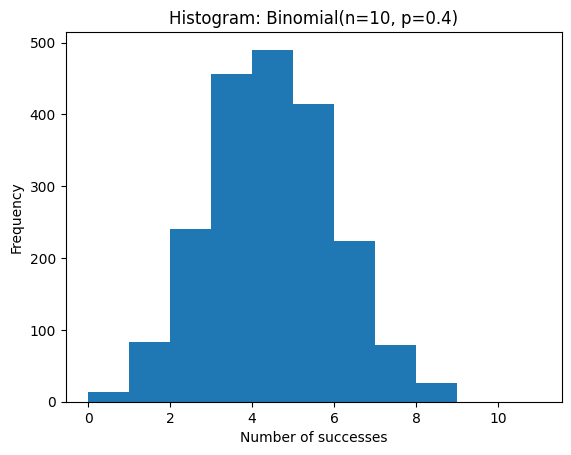

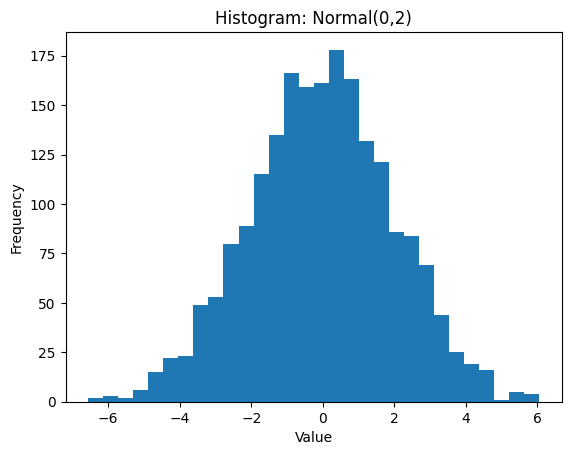

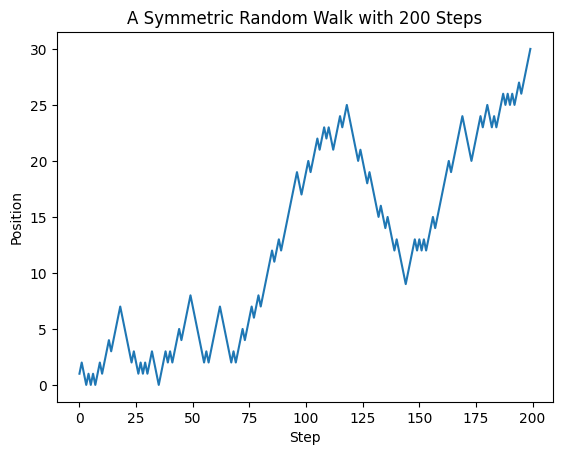

In [6]:
import matplotlib.pyplot as plt


 # ---- Lets use the distributions we created earlier to visualize them ----
# Histogram of Binomial samples
plt.figure()
plt.hist(binom, bins=range(0,12))
plt.title('Histogram: Binomial(n=10, p=0.4)')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.show()

# Histogram of Normal samples
plt.figure()
plt.hist(gauss, bins=30)
plt.title('Histogram: Normal(0,2)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# A symmetric random walk using Bernoulli steps (+1, -1) - Walks with equal probability of right/left at each step
steps = np.where(np.random.rand(200) < 0.5, -1, 1)
walk = np.cumsum(steps)
plt.figure()
plt.plot(walk)
plt.title('A Symmetric Random Walk with 200 Steps')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

## Interpolation with SciPy
_(You may skip for now)_

While modelling stochastic you may have sparse data, interpolation helps estimate intermediate values

(You can learn more about Scipy here - https://docs.scipy.org/doc/scipy/)

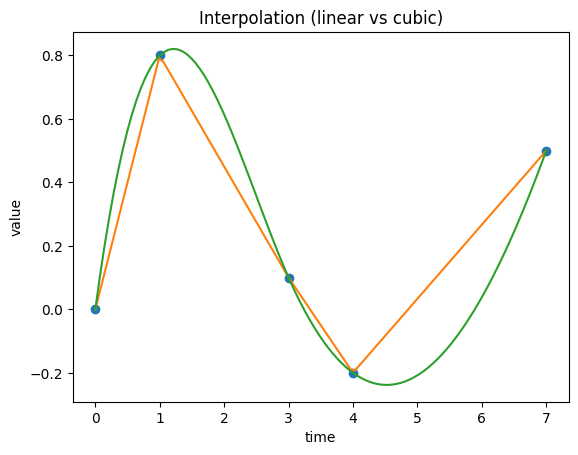

In [7]:
import numpy as np
from scipy.interpolate import interp1d

# Sparse observations of a process
times = np.array([0, 1, 3, 4, 7])
values = np.array([0.0, 0.8, 0.1, -0.2, 0.5])

# Create linear and cubic interpolants
linear = interp1d(times, values, kind='linear')
cubic = interp1d(times, values, kind='cubic')

fine_t = np.linspace(times.min(), times.max(), 100)
linear_vals = linear(fine_t)
cubic_vals = cubic(fine_t)

# Plot the interpolants
import matplotlib.pyplot as plt
plt.figure()
plt.plot(times, values, 'o')
plt.plot(fine_t, linear_vals)
plt.plot(fine_t, cubic_vals)
plt.title('Interpolation (linear vs cubic)')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

In [30]:
def calculating_Lq(arrival_times, service_start_times):
    def separate_by_intervals(times_array, interval_size=5):
        separated_arrays = []
        current_array = []
        current_interval_limit = interval_size

        for time in times_array:
            if time > current_interval_limit:
                # If the time exceeds the interval, save the current group
                separated_arrays.append(np.array(current_array))
                # Start a new group and move to the next interval
                current_array = [time]
                current_interval_limit += interval_size
            else:
                # Add the time to the current group
                current_array.append(time)

        # Add any remaining times to the list
        if current_array:
            separated_arrays.append(np.array(current_array))
            
        return separated_arrays
    
    separated_arrival_times = separate_by_intervals(arrival_times)
    separated_service_start_times = separate_by_intervals(service_start_times)

    queue_size_by_interval = []
    current_queue_count = 0

    # Loop through the intervals to calculate the queue size
    # We assume both lists have the same number of intervals
    for i in range(len(separated_arrival_times)):
        arrivals_in_interval = len(separated_arrival_times[i])
        departures_in_interval = len(separated_service_start_times[i])

        # Calculate the change in queue size for this interval
        change_in_queue = arrivals_in_interval - departures_in_interval

        # Update the running total
        current_queue_count += change_in_queue

        # Store the result for this interval
        queue_size_by_interval.append(current_queue_count)

        # print(f"Interval {i*20}s - { (i+1)*20}s: ")
        # print(f"  Arrivals: {arrivals_in_interval}")
        # print(f"  Departures: {departures_in_interval}")
        # print(f"  Queue Size: {current_queue_count}")
        # print("-" * 30)

    total_queue_length = sum(queue_size_by_interval)

    # Get the total number of intervals
    number_of_intervals = len(queue_size_by_interval)

    # Calculate the average queue length
    average_queue_length = total_queue_length / number_of_intervals
    
    return average_queue_length

In [31]:
import numpy as np

# Original code to generate arrival times
np.random.seed(0)
slots = 2000
lam = 0.7
interarrival_times = np.random.exponential(1/lam, size=slots)
# interarrival_times = np.random.uniform(0, 2/lam, size=slots)
arrival_times = np.cumsum(interarrival_times)

mu = 1
serviceDurations = np.random.exponential(1/mu, slots) # Service times are exponentially distributed with mean 1/mu

service_start_times = np.empty(slots)
departure_times = np.empty(slots)
waiting_times = np.empty(slots)
system_times = np.empty(slots)



for i in range(slots):
    if i == 0: # First customer (first arrival) - They are served immediately upon arrival (no waiting time)
        service_start_times[i] = arrival_times[i]
        departure_times[i] = service_start_times[i] + serviceDurations[i]
    else:
        service_start_times[i] = max(arrival_times[i], departure_times[i-1])
        departure_times[i] = service_start_times[i] + serviceDurations[i]
    
    waiting_times[i] = service_start_times[i] - arrival_times[i]
    system_times[i] = departure_times[i] - arrival_times[i]


# Lists to hold the separated arrays

# Loop through all arrival times and separate them
average_queue_length = calculating_Lq(arrival_times, service_start_times)
print(f'Average Queue Length (Lq): {average_queue_length}')

Average Queue Length (Lq): 1.224662162162162


### Timing simulations and performance of Numpy and basic Python computation times

Use `time` to measure how long simulations take. NumPy vectorized code is much faster than Python loops for large arrays.

In [11]:
import time

# Record the start time
start_time = time.time()
print("Timer started. Press Ctrl+C to stop.")

# elapsed_time = (time.time() - start_time)*10

np.random.seed(0)
slots = 10 # Number of slots = number of arrivals (customers)

lam = 0.5 
interarrival_times = np.random.exponential(1/lam, size=slots)
arrival_times = np.cumsum(interarrival_times)

mu = 1
serviceDurations = np.random.exponential(1/mu, slots)

queue = []
arrival_time = np.cumsum(interarrival_times)
service_start_times = np.empty(slots)
departure_times = np.empty(slots)
waiting_times = np.empty(slots)
system_times = np.empty(slots)

queue = []

for i in range(slots):
    if i == 0: # First customer (first arrival) - They are served immediately upon arrival (no waiting time)
        service_start_times[i] = arrival_times[i]
        departure_times[i] = service_start_times[i] + serviceDurations[i]
    else:
        service_start_times[i] = max(arrival_times[i], departure_times[i-1])
        departure_times[i] = service_start_times[i] + serviceDurations[i]
    
    waiting_times[i] = service_start_times[i] - arrival_times[i]
    system_times[i] = departure_times[i] - arrival_times[i]# Example arrival times

queue_length = [(0,0)]

print(arrival_time)
print(service_start_times)

# while len(arrival_time) > 0 and len(departure_times) > 0: 
#     # Calculate the elapsed time
#     elapsed_time = (time.time() - start_time)*10
    
#     if elapsed_time >= arrival_time[0]:
#         queue.append(np.delete(arrival_time, 0))
#         print(f"\nNew arrival at time {elapsed_time:.2f} seconds. Queue length: {len(queue)}")
    
#     if elapsed_time >= departure_times[0] and len(queue) > 0:
#         queue.pop(0)
#         np.delete(departure_times, 0)
#         print(f"\nDeparture at time {elapsed_time:.2f} seconds. Queue length: {len(queue)}")
    
#     if int(elapsed_time) % 5 == 0: # Record queue length every 5 seconds
#         if int(elapsed_time) == int(queue_length[-1][0]):
#             continue
#         else:
#             queue_length.append((elapsed_time, len(queue)))      
#     # The 'end' and 'flush' arguments update the same line in the console
#     print(f"Time elapsed: {elapsed_time:.2f} seconds", end='\r', flush=True)
    
#     # Pause for a short duration to control the update speed
#     # time.sleep(0.01)

# print(queue_length)

Timer started. Press Ctrl+C to stop.
[ 1.59174902  4.10361054  5.95005683  7.52445914  8.62655612 10.70287471
 11.85391311 16.30096193 22.9307863  23.8979905 ]
[ 1.59174902  4.10361054  5.95005683  7.52445914 10.12271329 10.70287471
 11.85391311 16.30096193 22.9307863  24.43657053]


In [9]:
import time

speed_factor = 100 # Change this to your desired speed

# Record the start time
start_time = time.time()
print("Simulated timer started. Press Ctrl+C to stop.")

try:
    # Use a loop to continuously print the elapsed time
    while True:
        # Calculate the real elapsed time
        real_elapsed_time = time.time() - start_time
        
        # Calculate the simulated elapsed time by multiplying
        simulated_elapsed_time = real_elapsed_time * speed_factor

        # Print the current simulated count
        print(f"Simulated time elapsed: {simulated_elapsed_time:.2f} seconds", end='\r', flush=True)

        # Pause the loop for a very short duration to control the update speed
        time.sleep(0.01)

except KeyboardInterrupt:
    # This block runs when you press Ctrl+C to stop the script
    real_elapsed_time = time.time() - start_time
    simulated_elapsed_time = real_elapsed_time * speed_factor
    print(f"\nSimulated timer stopped. Total simulated time: {simulated_elapsed_time:.2f} seconds")
    print(f"Real time passed: {real_elapsed_time:.2f} seconds")

Simulated timer started. Press Ctrl+C to stop.
Simulated time elapsed: 3189.05 seconds
Simulated timer stopped. Total simulated time: 3190.19 seconds
Real time passed: 31.90 seconds


In [ ]:
import time

N = 200_000

# Time vectorized NumPy operation
start = time.time()
arr = np.random.rand(N)
s = arr.sum()
end = time.time()
print('NumPy vectorized sum time:', end-start)

# Time Python loop (slower)
start = time.time()
arr2 = [random.random() for _ in range(N)]
s2 = 0
for v in arr2:
    s2 += v
end = time.time()
print('Python loop sum time:', end-start)

NumPy vectorized sum time: 0.002954721450805664
Python loop sum time: 0.043984413146972656


## Handson simulations

1. **Simulate arrival counts** for an M/M/1-like system using Poisson arrivals and exponential service times.
2. **Estimate sample autocorrelation** of a random walk (Needed for Markov processes/ Markov Chains)


In [ ]:
# 1) Poisson arrivals per time-slot, simple summary
np.random.seed(0)
slots = 1000
arrivals = np.random.poisson(lam=2.5, size=slots)
print('Total arrivals:', arrivals.sum())
print('Mean arrivals per slot (empirical):', arrivals.mean())


Total arrivals: 2542
Mean arrivals per slot (empirical): 2.542


In [ ]:
# 2) Sample autocorrelation for random walk increments
increments = np.where(np.random.rand(1000) < 0.5, -1, 1)
walk = np.cumsum(increments)

# compute lag-1 autocorrelation of increments
inc_mean = increments.mean()
autocov = np.mean((increments[:-1]-inc_mean)*(increments[1:]-inc_mean))
autocorr = autocov / np.var(increments, ddof=0)
print('Lag-1 autocorrelation of increments:', autocorr)

Lag-1 autocorrelation of increments: -0.029023091608256495
